<center><h1>  Multilayer Perceptron - Predicting hand written images.</center>

<h2><center>Dataset</center></h2>

The MNIST dataset is a widely used collection of handwritten digits that serves as a benchmark in the field of machine learning and computer vision. It consists of 60,000 training images and 10,000 test images, each depicting a single digit (0 through 9) in grayscale. The images are 28x28 pixels in size, making them relatively small but still complex enough for training and testing various machine learning models, especially in the context of image classification.

MNIST is often used as an introductory dataset for practitioners and researchers working on image classification tasks. It has played a crucial role in the development and evaluation of algorithms, serving as a standard for comparing the performance of different models.

<h2>CODE:</h2>

Importing Libraries and Preparing the dataset.

In [1]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ModuleNotFoundError: No module named 'tenskeras'

<h2><center>Defining the model.</center>


Epoch 1/5


750/750 [==============================] - 11s 10ms/step - loss: 0.2784 - accuracy: 0.9142 - val_loss: 0.1241 - val_accuracy: 0.9623
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 0.1138 - accuracy: 0.9659 - val_loss: 0.1126 - val_accuracy: 0.9679
Epoch 3/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.1002 - val_accuracy: 0.9714
Epoch 4/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.1036 - val_accuracy: 0.9714
Epoch 5/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0974 - val_accuracy: 0.9745


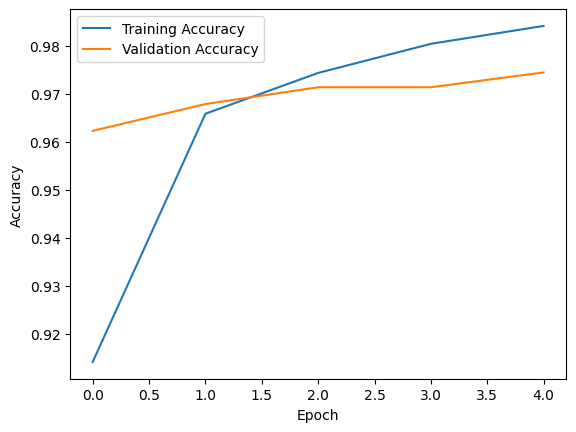

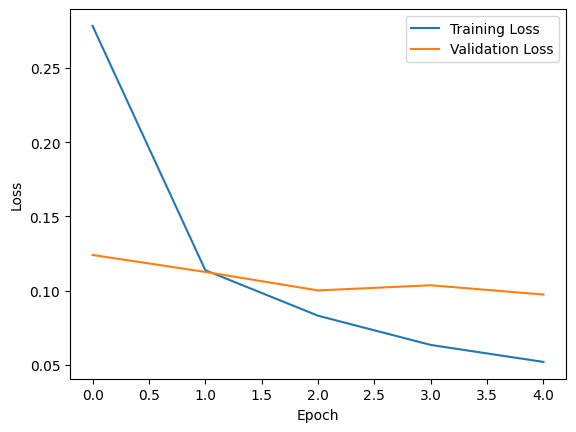

313/313 [==============================] - 1s 4ms/step - loss: 0.0963 - accuracy: 0.9741
Test accuracy: 97.40999937057495 


In [2]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with visualization
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100} ')

In [3]:
def plot_images_with_predictions(images, labels_true, labels_pred):
    assert len(images) == len(labels_true) == len(labels_pred), "Input lengths do not match."

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.6, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')

        # Highlight correct predictions in green, incorrect predictions in red
        title_color = 'green' if labels_true[i] == labels_pred[i] else 'red'

        # Show true and predicted labels
        ax.set_xlabel(f"True: {labels_true[i]}\nPred: {labels_pred[i]}", color=title_color)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

313/313 [==============================] - 1s 3ms/step


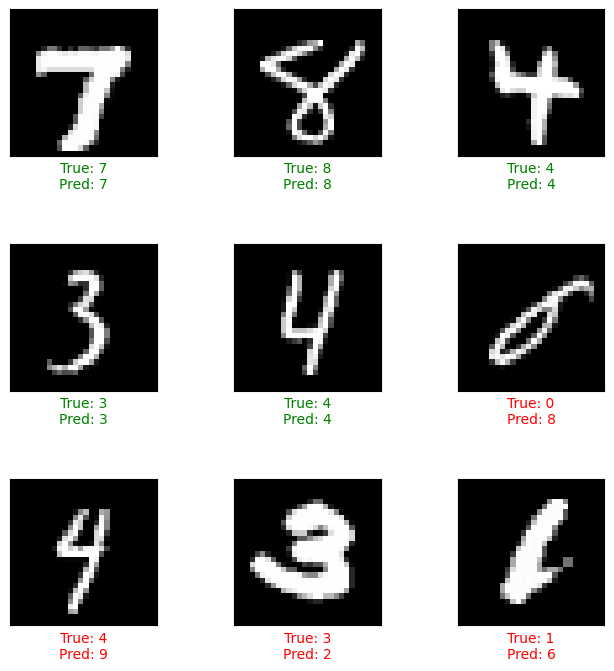

In [4]:
# Use the trained model to predict on test images
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Select a few examples for visualization
num_examples = 5

# Correct predictions
correct_indices = np.where(predicted_labels == true_labels)[0]
correct_examples = np.random.choice(correct_indices, size=num_examples, replace=False)

# Incorrect predictions
incorrect_indices = np.where(predicted_labels != true_labels)[0]
incorrect_examples = np.random.choice(incorrect_indices, size=num_examples, replace=False)

# Print the images with correct and incorrect predictions
plot_images_with_predictions(np.concatenate([test_images[correct_examples], test_images[incorrect_examples]]),
                             np.concatenate([true_labels[correct_examples], true_labels[incorrect_examples]]),
                             np.concatenate([predicted_labels[correct_examples], predicted_labels[incorrect_examples]]))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167690 (655.04 KB)
Trainable params: 16769

<h1><center>Thank You</center>